In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('UNSW_NB15_training-set.csv',sep=';')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,1.214780e-01,tcp,-,FIN,6,4,258,172,7408749.0,...,1,1,0,0,0,1,1,0,Normal,0
1,2,6.499020e-01,tcp,-,FIN,14,38,734,42014,78473372.0,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129e+06,tcp,-,FIN,8,16,364,13186,14170161.0,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642e+06,tcp,ftp,FIN,12,12,628,770,13677108.0,...,1,3,1,1,0,2,1,0,Normal,0
4,5,4.494540e-01,tcp,-,FIN,10,6,534,268,33373826.0,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
df.set_index('id',inplace=True)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,1.214780e-01,tcp,-,FIN,6,4,258,172,7408749.0,252,...,1,1,0,0,0,1,1,0,Normal,0
2,6.499020e-01,tcp,-,FIN,14,38,734,42014,78473372.0,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129e+06,tcp,-,FIN,8,16,364,13186,14170161.0,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642e+06,tcp,ftp,FIN,12,12,628,770,13677108.0,62,...,1,3,1,1,0,2,1,0,Normal,0
5,4.494540e-01,tcp,-,FIN,10,6,534,268,33373826.0,254,...,1,40,0,0,0,2,39,0,Normal,0


Text(0.5, 1.0, 'Cantidad de tipos de paquetes')

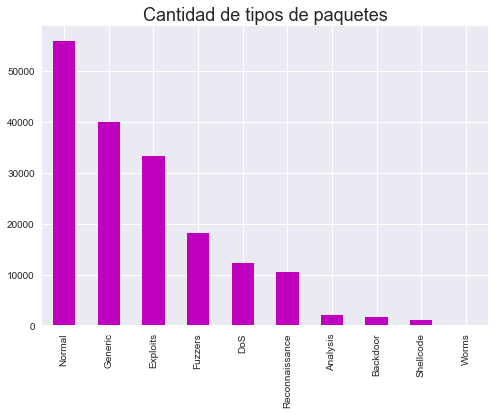

In [4]:
plt.style.use('seaborn')
df.attack_cat.value_counts().plot(kind='bar',color='m')
plt.title('Cantidad de tipos de paquetes',size=18)

In [5]:
data_df=df.loc[(df.attack_cat=='Normal') | (df.attack_cat=='DoS')]#Separacion de los paquetes normales y DoS en otro dataset
data_df.service.value_counts()#Cantidad de paquetes por servicio

-           46985
dns          7600
http         6564
ftp-data     2560
smtp         1874
ssh          1291
ftp          1268
pop3           65
dhcp           33
snmp           14
irc             4
ssl             4
radius          2
Name: service, dtype: int64

In [6]:
data_df.isna().any()#verificar si hay datos nulos en cada columna

dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
is_ftp_login         False
c

In [8]:
datos=data_df.loc[data_df.service != '-']
datos.attack_cat.value_counts()

Normal    19488
DoS        1791
Name: attack_cat, dtype: int64

In [9]:
dataset=pd.concat([datos.loc[datos.attack_cat=='Normal'].iloc[0:150],datos.loc[datos.attack_cat=='DoS'].iloc[0:150]],
                  ignore_index=True)
dataset.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.681642e+06,tcp,ftp,FIN,12,12,628,770,1.367711e+07,62,...,1,3,1,1,0,2,1,0,Normal,0
1,2.093085e+06,tcp,smtp,FIN,62,28,56329,2212,4.252097e+07,62,...,1,2,0,0,0,1,1,0,Normal,0
2,2.000000e-06,udp,snmp,INT,2,0,138,0,5.000000e+09,254,...,1,4,0,0,0,2,1,0,Normal,0
3,3.935560e-01,tcp,http,FIN,10,8,860,1096,4.319589e+07,62,...,1,2,0,0,1,1,3,0,Normal,0
4,3.380170e-01,tcp,http,FIN,10,6,998,268,4.437647e+07,254,...,1,1,0,0,1,2,3,0,Normal,0


Text(0.5, 1.0, 'Tipos de servicios usados por los DoS')

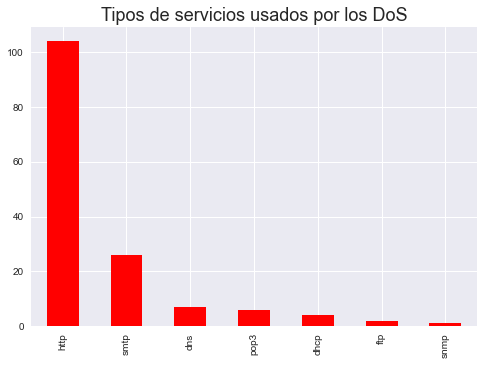

In [10]:
dataset.loc[dataset.attack_cat=='DoS'].service.value_counts().plot(kind='bar',color='r')
plt.title('Tipos de servicios usados por los DoS',size=18)

Text(0.5, 1.0, 'Tipos de servicios usados por los Normales')

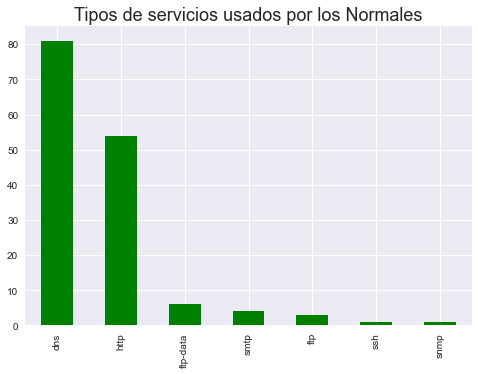

In [11]:
dataset.loc[dataset.attack_cat=='Normal'].service.value_counts().plot(kind='bar',color='g')
plt.title('Tipos de servicios usados por los Normales',size=18)

In [14]:
labels=np.c_[dataset['label'].values]
dataset.drop(['attack_cat','label'],axis='columns',inplace=True)
dataset.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1.681642e+06,tcp,ftp,FIN,12,12,628,770,1.367711e+07,62,...,2,1,1,3,1,1,0,2,1,0
1,2.093085e+06,tcp,smtp,FIN,62,28,56329,2212,4.252097e+07,62,...,1,1,1,2,0,0,0,1,1,0
2,2.000000e-06,udp,snmp,INT,2,0,138,0,5.000000e+09,254,...,1,1,1,4,0,0,0,2,1,0
3,3.935560e-01,tcp,http,FIN,10,8,860,1096,4.319589e+07,62,...,1,1,1,2,0,0,1,1,3,0
4,3.380170e-01,tcp,http,FIN,10,6,998,268,4.437647e+07,254,...,1,1,1,1,0,0,1,2,3,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['service']=le.fit_transform(dataset.service.values)
dataset['proto']=le.fit_transform(dataset.proto.values)
dataset['state']=le.fit_transform(dataset.state.values)
dataset.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1.681642e+06,0,2,1,12,12,628,770,1.367711e+07,62,...,2,1,1,3,1,1,0,2,1,0
1,2.093085e+06,0,6,1,62,28,56329,2212,4.252097e+07,62,...,1,1,1,2,0,0,0,1,1,0
2,2.000000e-06,1,7,2,2,0,138,0,5.000000e+09,254,...,1,1,1,4,0,0,0,2,1,0
3,3.935560e-01,0,4,1,10,8,860,1096,4.319589e+07,62,...,1,1,1,2,0,0,1,1,3,0
4,3.380170e-01,0,4,1,10,6,998,268,4.437647e+07,254,...,1,1,1,1,0,0,1,2,3,0


In [22]:
X=dataset.values

In [23]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
X_scaled.mean(axis=0)

array([ 1.77635684e-17,  0.00000000e+00,  4.73695157e-17,  1.42108547e-16,
        0.00000000e+00, -3.55271368e-17,  1.18423789e-17,  2.36847579e-17,
       -9.47390314e-17,  0.00000000e+00, -9.47390314e-17, -7.10542736e-17,
       -5.32907052e-17, -1.18423789e-17, -1.18423789e-17,  3.55271368e-17,
       -2.96059473e-17, -9.47390314e-17,  0.00000000e+00,  4.73695157e-17,
       -9.47390314e-17, -2.36847579e-17,  4.73695157e-17,  1.42108547e-16,
        0.00000000e+00,  9.47390314e-17,  2.36847579e-17, -4.73695157e-17,
        2.36847579e-17,  1.18423789e-17,  4.73695157e-17,  1.42108547e-16,
        2.36847579e-17, -4.73695157e-17, -1.77635684e-16, -2.36847579e-17,
       -3.55271368e-17, -3.55271368e-17, -9.47390314e-17, -8.28966525e-17,
       -4.73695157e-17,  0.00000000e+00])

In [25]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0.])

## PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
PcaTrain=pca.fit_transform(X_scaled)
PcaTrain.shape

(300, 10)

In [33]:
labels=labels.ravel()

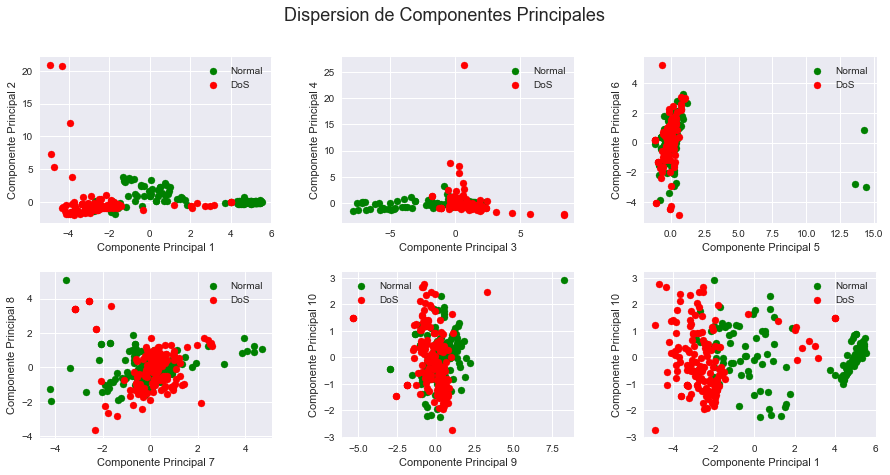

In [52]:
fig, ax= plt.subplots(2,3,figsize=(15,7))
X=PcaTrain[:,0]
Y=PcaTrain[:,1]
etiquetas=['Normal','DoS']
colors=['g','r']
for i in range(0,2):
    ax[0,0].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[0,0].legend()
ax[0,0].set_xlabel('Componente Principal 1')
ax[0,0].set_ylabel('Componente Principal 2')
X=PcaTrain[:,2]
Y=PcaTrain[:,3]
for i in range(0,2):
    ax[0,1].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[0,1].legend()
ax[0,1].set_xlabel('Componente Principal 3')
ax[0,1].set_ylabel('Componente Principal 4')
X=PcaTrain[:,4]
Y=PcaTrain[:,5]
for i in range(0,2):
    ax[0,2].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[0,2].legend()
ax[0,2].set_xlabel('Componente Principal 5')
ax[0,2].set_ylabel('Componente Principal 6')
X=PcaTrain[:,6]
Y=PcaTrain[:,7]
for i in range(0,2):
    ax[1,0].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[1,0].legend()
ax[1,0].set_xlabel('Componente Principal 7')
ax[1,0].set_ylabel('Componente Principal 8')
X=PcaTrain[:,8]
Y=PcaTrain[:,9]
for i in range(0,2):
    ax[1,1].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[1,1].legend()
ax[1,1].set_xlabel('Componente Principal 9')
ax[1,1].set_ylabel('Componente Principal 10')
X=PcaTrain[:,0]
Y=PcaTrain[:,9]
for i in range(0,2):
    ax[1,2].scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax[1,2].legend()
ax[1,2].set_xlabel('Componente Principal 1')
ax[1,2].set_ylabel('Componente Principal 10')
plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle('Dispersion de Componentes Principales', fontsize=18)
plt.plot();

### Usando 2 Componentes Principales

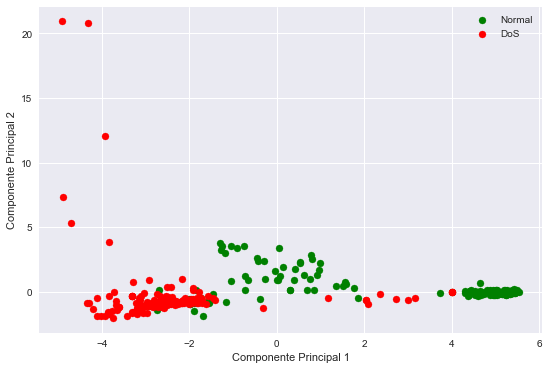

In [53]:
pca2 = PCA(n_components=2)
PcaTrain2=pca2.fit_transform(X_scaled)
fig, ax= plt.subplots(figsize=(9,6))
X=PcaTrain2[:,0]
Y=PcaTrain2[:,1]
etiquetas=['Normal','DoS']
colors=['g','r']
for i in range(0,2):
    ax.scatter(X[labels==i],Y[labels==i],color=colors[i],label=etiquetas[i])
ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
plt.plot();

### Reducción a 3 dimensiones

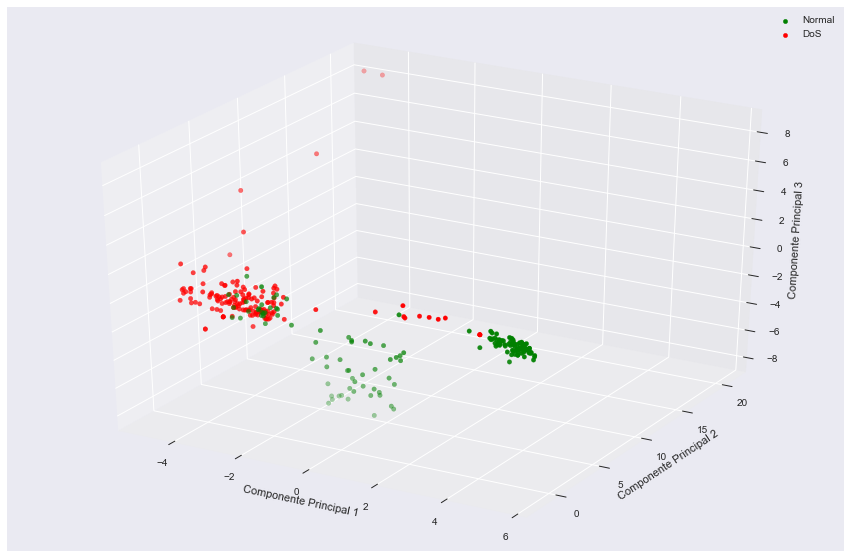

In [64]:
fig=plt.figure(figsize=(15,10))
ax= plt.axes(projection='3d')
pca3=PCA(n_components=3)
PcaTrain3=pca3.fit_transform(X_scaled)
x=PcaTrain3[:,0]
y=PcaTrain3[:,1]
z=PcaTrain3[:,2]
etiquetas=['Normal','DoS']
colors=['g','r']
for i in range(0,2):
    ax.scatter(x[labels==i],y[labels==i],z[labels==i],c=colors[i],label=etiquetas[i])
ax.legend()
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show();

In [66]:
pca.explained_variance_ratio_

array([0.27421068, 0.11686966, 0.10887   , 0.08138932, 0.05306934,
       0.04398613, 0.03670289, 0.03031989, 0.02953684, 0.02559601])

In [67]:
pca2.explained_variance_ratio_

array([0.27421068, 0.11686966])

In [68]:
pca3.explained_variance_ratio_

array([0.27421068, 0.11686966, 0.10887   ])

### Usando el radio de varianza

In [69]:
pca_radio=PCA(n_components=0.95)
transformado=pca_radio.fit_transform(X_scaled)
transformado.shape

(300, 21)